## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [73]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


### Find dimensions of an image in the dataset

In [74]:
x_train[0].shape

(28, 28)

In [75]:
y_train[0]

9

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils

y_train= keras.utils.to_categorical(y_train,10)
y_test= keras.utils.to_categorical(y_test,10)

In [77]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train.shape[0]

x_train= x_train / 255
x_test = x_test / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
 #reshaping done in the above cell.

### Import the necessary layers from keras to build the model

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [82]:
# Define model
    model1 = Sequential()

    # 1st Conv Layer
    model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model1.add(Activation('relu'))

    # 2nd Conv Layer
    model1.add(Convolution2D(32, 3, 3))
    model1.add(Activation('relu'))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(128))
    model1.add(Activation('relu'))

    # Prediction Layer
    model1.add(Dense(10))
    model1.add(Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model1.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.3667 - acc: 0.8683 - val_loss: 0.3088 - val_acc: 0.8850
Epoch 2/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.2227 - acc: 0.9175 - val_loss: 0.2518 - val_acc: 0.9113
Epoch 3/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.1565 - acc: 0.9421 - val_loss: 0.2478 - val_acc: 0.9144
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.1044 - acc: 0.9608 - val_loss: 0.2747 - val_acc: 0.9182
Epoch 5/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0689 - acc: 0.9742 - val_loss: 0.3138 - val_acc: 0.9119
Epoch 6/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.0448 - acc: 0.9837 - val_loss: 0.3785 - val_acc: 0.9171
Epoch 7/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0325 - acc: 0.9885 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [83]:
# Define Model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Max Pooling
    model2.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model2.add(Dropout(0.25))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))
    

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.3931 - acc: 0.8583 - val_loss: 0.3016 - val_acc: 0.8913
Epoch 2/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2569 - acc: 0.9060 - val_loss: 0.2521 - val_acc: 0.9100
Epoch 3/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2108 - acc: 0.9223 - val_loss: 0.2347 - val_acc: 0.9152
Epoch 4/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1767 - acc: 0.9341 - val_loss: 0.2245 - val_acc: 0.9214
Epoch 5/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1509 - acc: 0.9436 - val_loss: 0.2254 - val_acc: 0.9219
Epoch 6/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1286 - acc: 0.9507 - val_loss: 0.2351 - val_acc: 0.9230
Epoch 7/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.1105 - acc: 0.9578 - val_loss: 0.2484 -

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

    
# Prepare the generator
datagen.fit(x_train)



#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

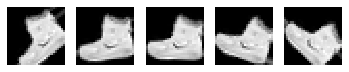

In [86]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [88]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  12/1875 [..............................] - ETA: 20s - loss: 2.4767 - acc: 0.4349

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 20s 11ms/step - loss: 0.5007 - acc: 0.8207 - val_loss: 0.2868 - val_acc: 0.8994
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3657 - acc: 0.8674 - val_loss: 0.2652 - val_acc: 0.9092
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3318 - acc: 0.8770 - val_loss: 0.2616 - val_acc: 0.9120
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3091 - acc: 0.8868 - val_loss: 0.2527 - val_acc: 0.9144
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2938 - acc: 0.8918 - val_loss: 0.2660 - val_acc: 0.9138
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2849 - acc: 0.8949 - val_loss: 0.2605 - val_acc: 0.9124
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2709 - acc: 0.9005 - val_loss: 0.2503 - val_acc: 0.9154
Epoch 8/10
1875/1875 [==============================] - 20s

###  Report the final train and validation accuracy

In [89]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 3s 55us/step
[0.15105578390012184, 0.9436]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10, mnist

### **Load CIFAR10 dataset**

In [0]:
(x1_train, y1_train), (x1_test, y1_test) = cifar10.load_data()

In [0]:
x1_train = x1_train.reshape(x1_train.shape[0], 32,32,3).astype('float32')
x1_test = x1_test.reshape(x1_test.shape[0], 32, 32, 3).astype('float32')
x1_train.shape[0]

x1_train= x1_train / 255
x1_test = x1_test / 255

In [0]:
y1_train= keras.utils.to_categorical(y1_train,10)
y1_test= keras.utils.to_categorical(y1_test,10)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen1 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

    
# Prepare the generator
datagen1.fit(x1_train)

### **Prepare/fit the generator.**

In [134]:
# Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # 3rd Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
    model3.add(Activation('relu'))

  

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  if sys.path[0] == '':


In [135]:
model3.fit_generator(datagen1.flow(x1_train, y1_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x1_test, y1_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1562, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
1562/1562 [==============================] - 30s 19ms/step - loss: 1.6010 - acc: 0.4233 - val_loss: 1.3340 - val_acc: 0.5171
Epoch 2/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.3491 - acc: 0.5191 - val_loss: 1.2701 - val_acc: 0.5486
Epoch 3/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.2447 - acc: 0.5574 - val_loss: 1.0863 - val_acc: 0.6171
Epoch 4/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.1735 - acc: 0.5842 - val_loss: 1.0792 - val_acc: 0.6213
Epoch 5/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.1239 - acc: 0.6030 - val_loss: 1.0918 - val_acc: 0.6130
Epoch 6/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.0909 - acc: 0.6129 - val_loss: 1.0398 - val_acc: 0.6471
Epoch 7/10
1562/1562 [==============================] - 28s 18ms/step - loss: 1.0609 - acc: 0.6255 - val_loss: 1.0157 - val_acc: 0.6426
Epoch 8/10
1562/1562 [==========================

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

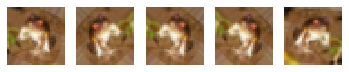

In [136]:
from matplotlib import pyplot as plt
gen = datagen1.flow(x1_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()